In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Regression avec SKLean

In [2]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X**2 + np.random.randn(m, 1)

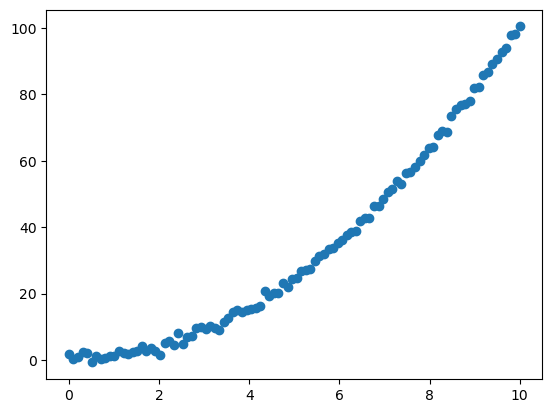

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [5]:
model = SVR(C=100)
model.fit(X, y)
model.score(X, y)

c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989763625652847

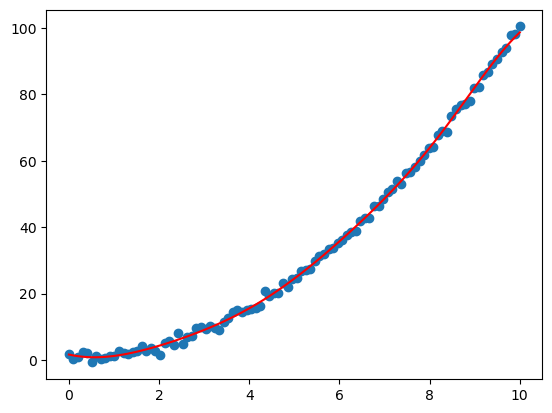

In [6]:
prediction = model.predict(X)

plt.scatter(X, y)
plt.plot(X, prediction, c='r')

In [7]:
import pandas as pd
import seaborn as sns

In [8]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
colums_to_check = ['survived', 'pclass', 'sex', 'age']
rows_with_nan = titanic[titanic[colums_to_check].isnull().any(axis=1)]


In [10]:
print(rows_with_nan.shape)
rows_with_nan.index

(177, 15)


Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [11]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
print(titanic.shape)
titanic.head()
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

(714, 4)


C:\Users\bilal\AppData\Local\Temp\ipykernel_22708\1962043370.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
C:\Users\bilal\AppData\Local\Temp\ipykernel_22708\1962043370.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier()

In [14]:
model

KNeighborsClassifier()

In [15]:
y = titanic['survived']
x = titanic.drop('survived', axis=1)

In [16]:
model.fit(x, y)
model.score(x, y)

0.8417366946778712

In [17]:
import numpy as np

In [18]:
def survie(model, pclass=2, sex=0, age=24):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [19]:
# pclass = input("Entrez la class 1, 2 ,3 ")
# age = input("Entrez votre age :")
# sex = input("entrez votre sex male:0 female: 1")

survie(model)

[0]
[[1. 0.]]


c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.neighbors import KNeighborsClassifier
y = titanic['survived']
x = titanic.drop('survived', axis=1)

In [21]:
score = []
best_i = 1
best_score = 0
for i in range(best_i, 30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x, y)
    score_in = model.score(x, y)
    score.append(score_in)

    if(best_score < score_in):
        best_score = score_in
        best_i = i

print(f"Best score is {best_score}, for the k_neighbors : {best_i}")

Best score is 0.8739495798319328, for the k_neighbors : 1


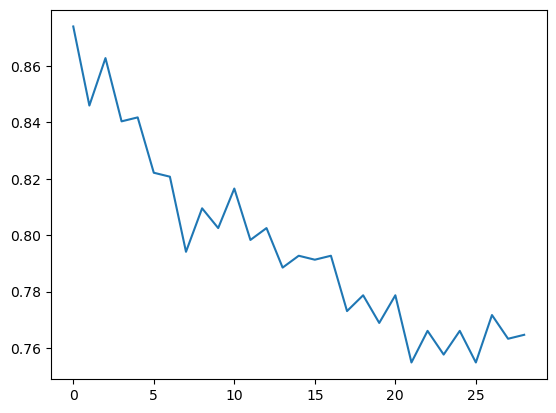

In [22]:
import matplotlib.pyplot as plt

plt.plot(score)

In [24]:
tableau = score
index_max = np.unravel_index(np.argmax(tableau), tableau.shape)

print("L'index de la valeur maximale est :", index_max)
print("La valeur maximale est :", tableau[index_max])

AttributeError: 'list' object has no attribute 'shape'